In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(r'D:/Data Science/Job Assignments/SunBaseData/Data/customer_churn_large_dataset.xlsx')
df.drop(['CustomerID', 'Name'], axis=1, inplace=True)
df.tail()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1
99999,27,Female,Los Angeles,19,76.57,173,1


In [3]:
X = df[df.columns].drop(['Churn'], axis=True)
y = df['Churn']

In [ ]:
# Define which columns should be onehot-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'], dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder # OneHot Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [6]:
# There is no feature engineering process we are doing with numerical columns like handling missing values, outliers detection, etc. 
# As we have seen in EDA, so we only do standardization 

## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    # ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    # ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehotencoder',OneHotEncoder(sparse=False)),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

d:\Data Science\Job Assignments\SunBaseData\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
X_train.head()

,num_pipeline__Age,num_pipeline__Subscription_Length_Months,num_pipeline__Monthly_Bill,num_pipeline__Total_Usage_GB,cat_pipeline__Gender_Female,cat_pipeline__Gender_Male,cat_pipeline__Location_Chicago,cat_pipeline__Location_Houston,cat_pipeline__Location_Los Angeles,cat_pipeline__Location_Miami,cat_pipeline__Location_New York
0,-1.243589,0.074501,1.632642,1.481066,0.000000,2.000033,0.000000,0.000000,2.499063,0.0,0.00000
1,0.654284,-1.515230,0.336478,0.829765,2.000033,0.000000,0.000000,2.492223,0.000000,0.0,0.00000
2,-0.785482,1.086147,0.027632,1.166909,0.000000,2.000033,2.510893,0.000000,0.000000,0.0,0.00000
3,1.112391,-0.070020,0.894871,-1.614532,2.000033,0.000000,0.000000,2.492223,0.000000,0.0,0.00000
4,1.701386,-1.081667,-1.144499,-1.346349,2.000033,0.000000,0.000000,0.000000,0.000000,0.0,2.50552


In [10]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

In [26]:
models = {
    # 'Logistic Regression': LogisticRegression(random_state=42),
    # 'SGDClassifier': SGDClassifier(),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    # 'SVC linear': SVC(kernel='linear'),
    # 'SVC rbf': SVC(kernel='rbf'),
    # 'NaiveBias':MultinomialNB(),
    'KNNR':KNeighborsClassifier(n_neighbors=2),
   
    # 'RandomForest':RandomForestClassifier(random_state=42),
    # 'AdaBoost':AdaBoostClassifier(),
    # 'Gradient Boosting':GradientBoostingClassifier(),
    # 'XGB':xgb.XGBClassifier(),
    # 'BaggingSVC':BaggingClassifier(estimator=SVC())
}

KNNR
Model Training Performance
Score 49.95666666666666


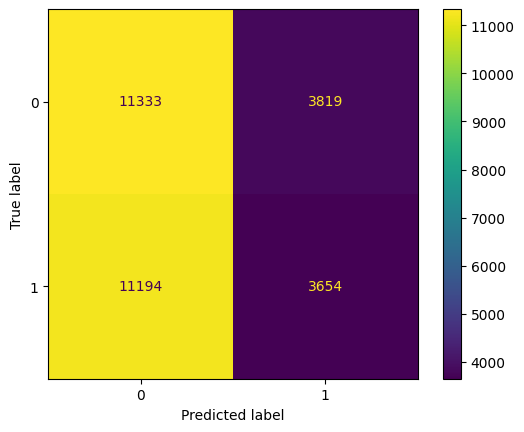

In [27]:
trained_model_list = {'Model_Name':[], 'Model': [], 'Score': []}

for i in range(len(list(models))):
    model=list(models.values())[i]

    # Train  on training data
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    score = accuracy_score(y_test,y_pred)


    print(list(models.keys())[i])

    print('Model Training Performance')
    print("Score",score*100)
    cm = confusion_matrix(y_test, y_pred)
    cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_dis.plot()
    plt.show()

    trained_model_list['Model_Name'].append(list(models.keys())[i])
    trained_model_list['Model'].append(model)
    trained_model_list['Score'].append(score*100)

    # trained_model_list.update({'Model_Name': list(models.keys())[i], 'Model': model, 'R2_Score': r2_square*100})

    print('='*35)
    print('\n')


In [28]:
pd.DataFrame(trained_model_list)

,Model_Name,Model,Score
0,KNNR,KNeighborsClassifier(n_neighbors=2),49.956667


In [22]:
pd.DataFrame(trained_model_list)

,Model_Name,Model,Score
0,Logistic Regression,LogisticRegression(random_state=42),50.466667
1,SGDClassifier,SGDClassifier(),50.450000
2,DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),49.930000
3,SVC linear,SVC(kernel='linear'),50.546667
4,SVC rbf,SVC(),50.246667
5,RandomForest,"(DecisionTreeClassifier(max_features='sqrt', r...",49.406667
6,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",50.420000
7,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,50.230000
8,XGB,"XGBClassifier(base_score=None, booster=None, c...",50.450000
9,BaggingSVC,"(SVC(random_state=236708574), SVC(random_state...",50.510000


In [11]:
from tabpfn import TabPFNClassifier
model = TabPFNClassifier()
model.fit(X_train, y_train, overwrite_warning=True)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


TabPFNClassifier()

In [12]:
y_pred = model.predict(X_test)

RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 235200000000 bytes.